In [1]:
#import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [3]:
#%load_ext autotime

time: 0 ns (started: 2023-05-06 17:17:32 -05:00)


In [4]:
#conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Usuario\anaconda3\envs\MIAD

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    certifi-2022.12.7          |   py39haa95532_0         153 KB  anaconda
    ------------------------------------------------------------
                                           Total:         310 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda None
  certifi                                         pkgs/main --> anaconda None
  openssl              pkgs/main::openssl-1.1.1t-h2bbff1b_0 --> anaconda::openssl-1.1.1s-h2bbff1b_0 None




certifi-2022.12.7    | 153 KB    |            |   0% 
certifi-2022.12.

In [77]:
#conda install seaborn

time: 0 ns (started: 2023-05-06 20:51:41 -05:00)


In [78]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import math

#from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

time: 0 ns (started: 2023-05-06 20:51:41 -05:00)


In [79]:
# Carga de datos de archivos .csv
url = 'SECOP I filtro.txt'
secop1 = pd.read_csv(url, delimiter='|', dtype='str')

# Selecciona las columnas seleccionadas en el preprocesamiento
columnasSeleccionadas = ['UID', #1
                         'Anno Cargue SECOP', #2
                         'Anno Firma Contrato', #3
                         'Nivel Entidad', #4
                         'Orden Entidad', #5
                         'Nombre Entidad', #6
                         'NIT de la Entidad', #7
                         'Código de la Entidad', #8
                         'ID Modalidad', #9
                         'Modalidad de Contratacion', #10
                         'Estado del Proceso', #11
                         'ID Objeto a Contratar', #15
                         'Objeto a Contratar', #16
                         'Detalle del Objeto a Contratar', #17
                         'Municipio de Obtencion', #19
                         'Municipio de Entrega', #20
                         'Numero de Constancia', #23
                         'Numero de Proceso', #24
                         'Numero de Contrato', #25
                         'Cuantia Proceso', #26
                         'ID Grupo', #27
                         'Nombre Grupo', #28
                         'ID Familia', #29
                         'Nombre Familia', #30
                         'ID Clase', #31
                         'Nombre Clase', #32
                         'ID Adjudicacion', #33
                         'Tipo Identifi del Contratista', #34
                         'Identificacion del Contratista', #35
                         'Nom Razon Social Contratista', #36
                         'Dpto y Muni Contratista', #37
                         'Identific Representante Legal', #39
                         'Nombre del Represen Legal', #40
                         'Fecha de Firma del Contrato', #41
                         'Fecha Ini Ejec Contrato', #42
                         'Plazo de Ejec del Contrato', #43
                         'Rango de Ejec del Contrato', #44
                         'Tiempo Adiciones en Dias', #45
                         'Tiempo Adiciones en Meses', #46
                         'Fecha Fin Ejec Contrato', #47
                         'Cuantia Contrato', #49
                         'Valor Total de Adiciones', #50
                         'Valor Contrato con Adiciones', #51
                         'Objeto del Contrato a la Firma', #52
                         'Proponentes Seleccionados', #53
                         'Calificacion Definitiva', #54
                         'Es PostConflicto', #59
                         'Municipio Entidad', #67
                         'Departamento Entidad', #68
                         'Ultima Actualizacion', #69
                         'Fecha Liquidacion', #70
                         'Cumple Decreto 248', #71
                         'IncluyeBienesDecreto248' #72
                         ]


# Imputa valores NA
secop1['Fecha Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].fillna(secop1['Fecha de Cargue en el SECOP'])
#secop1['Cuantía Contrato'] = secop1['Cuantía Contrato'].fillna(secop1['Cuantía Proceso'])

# Cambia el tipo de las columnas numericas
columnasNumero = ['Cuantia Proceso', #26
                  'Plazo de Ejec del Contrato', #43
                  'Tiempo Adiciones en Dias', #45 ? sobra
                  'Tiempo Adiciones en Meses', #46 ? sobra
                  'Cuantia Contrato', #49
                  'Valor Total de Adiciones', #50 ? sobra
                  'Valor Contrato con Adiciones' #51 ? sobra
                  ]
secop1[columnasNumero] = secop1[columnasNumero].astype('int64')

# Convierte a formato fecha
#secop1['Ultima Actualizacion'] = pd.to_datetime(secop1['Ultima Actualizacion'], format='%d/%m/%Y')
secop1['Fecha Ini Ejec Contrato'] = pd.to_datetime(secop1['Fecha Ini Ejec Contrato'], format='%d/%m/%Y')
# Extrae año y mes
secop1['Anno Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].dt.year
secop1['Mes Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].dt.month

# Convierte años de 0 a 4 segun su posicion en cuetrenios desde 2016
secop1['Anno Ini Ejec Contrato'] = (secop1['Anno Ini Ejec Contrato']-2016)%4


# Crea Prorroga y Adicion
#secop1['Prorroga'] = secop1['Tiempo Adiciones en Dias'].apply(lambda x: 'Prorrogado' if x != 0 else 'No Prorrogado')
secop1['Prorroga'] = secop1['Tiempo Adiciones en Dias'] + secop1['Tiempo Adiciones en Meses']
secop1['Prorroga'] = secop1['Prorroga'].apply(lambda x: 1 if x != 0 else 0)
#secop1['Adicion'] = secop1['Valor Total de Adiciones'].apply(lambda x: 'Adicionado' if x != 0 else 'No Adicionado')
secop1['Adicion'] = secop1['Valor Total de Adiciones'].apply(lambda x: 1 if x != 0 else 0)


# Selecciona las columnas seleccionadas en el feature engineering
columnasSeleccionadas = ['Orden Entidad', #5
                         'Modalidad de Contratacion', #10
                         'Estado del Proceso', #11 adicional
                         #'Nombre Regimen de Contratacion', #14 ? igual que modalidad
                         'Objeto a Contratar', #16
                         'Municipio de Obtencion', #19
                         #'Anno de Cargue en el SECOP', #22 ?
                         #'Mes de Cargue en el SECOP', #22 ?
                         'Cuantia Proceso', #26
                         'Nombre Grupo', #28
                         'Tipo Identifi del Contratista', #34
                         'Dpto y Muni Contratista', #37
                         'Anno Ini Ejec Contrato', #42
                         'Mes Ini Ejec Contrato', # 42
                         'Plazo de Ejec del Contrato', #43
                         'Rango de Ejec del Contrato', #44
                         'Prorroga', #45 y 46
                         'Tiempo Adiciones en Dias', #45 ? perdida de informacion
                         'Tiempo Adiciones en Meses', #46 ? perdida de informacion
                         'Cuantia Contrato', #49
                         'Adicion', #50
                         'Valor Total de Adiciones', #50 ? sobra
                         'Valor Contrato con Adiciones', #51 ? sobra
                         #'Proponentes Seleccionados', #53
                         'Departamento Entidad' #68
                         ]

secop1 = secop1[columnasSeleccionadas]

# filtra estados
secop1 = secop1[secop1['Estado del Proceso'].isin(['Liquidado', 'Terminado sin Liquidar'])]

# Crea estado
secop1['Estado del Proceso'] = secop1['Estado del Proceso'].apply(lambda x: 1 if x != 'Liquidado' else 0)

"""
# Codificar las columnas categoricas
#secop1['Nivel Entidad'] = pd.factorize(secop1['Nivel Entidad'])[0]
secop1['Orden Entidad'] = pd.factorize(secop1['Orden Entidad'])[0] #5
secop1['Modalidad de Contratacion'] = pd.factorize(secop1['Modalidad de Contratacion'])[0] #10
secop1['Estado del Proceso'] = pd.factorize(secop1['Estado del Proceso'])[0] #11
secop1['Municipio de Obtencion'] = pd.factorize(secop1['Municipio de Obtencion'])[0] #11
secop1['Nombre Grupo'] = pd.factorize(secop1['Nombre Grupo'])[0] #28
secop1['Tipo Identifi del Contratista'] = pd.factorize(secop1['Tipo Identifi del Contratista'])[0] #34
secop1['Dpto y Muni Contratista'] = pd.factorize(secop1['Dpto y Muni Contratista'])[0] #37
secop1['Rango de Ejec del Contrato'] = pd.factorize(secop1['Rango de Ejec del Contrato'])[0] #44
#secop1['Municipio Entidad'] = pd.factorize(secop1['Municipio Entidad'])[0]
secop1['Departamento Entidad'] = pd.factorize(secop1['Departamento Entidad'])[0] #68
#secop1['Prorroga'] = pd.factorize(secop1['Prorroga'])[0]
#secop1['Adicion'] = pd.factorize(secop1['Adicion'])[0]
"""

# Eliminación filas con observaciones nulas
#secop1.dropna(inplace=True)
#secop1.head()

"\n# Codificar las columnas categoricas\n#secop1['Nivel Entidad'] = pd.factorize(secop1['Nivel Entidad'])[0]\nsecop1['Orden Entidad'] = pd.factorize(secop1['Orden Entidad'])[0] #5\nsecop1['Modalidad de Contratacion'] = pd.factorize(secop1['Modalidad de Contratacion'])[0] #10\nsecop1['Estado del Proceso'] = pd.factorize(secop1['Estado del Proceso'])[0] #11\nsecop1['Municipio de Obtencion'] = pd.factorize(secop1['Municipio de Obtencion'])[0] #11\nsecop1['Nombre Grupo'] = pd.factorize(secop1['Nombre Grupo'])[0] #28\nsecop1['Tipo Identifi del Contratista'] = pd.factorize(secop1['Tipo Identifi del Contratista'])[0] #34\nsecop1['Dpto y Muni Contratista'] = pd.factorize(secop1['Dpto y Muni Contratista'])[0] #37\nsecop1['Rango de Ejec del Contrato'] = pd.factorize(secop1['Rango de Ejec del Contrato'])[0] #44\n#secop1['Municipio Entidad'] = pd.factorize(secop1['Municipio Entidad'])[0]\nsecop1['Departamento Entidad'] = pd.factorize(secop1['Departamento Entidad'])[0] #68\n#secop1['Prorroga'] = pd

time: 4.58 s (started: 2023-05-06 20:51:41 -05:00)


In [80]:
secop1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54404 entries, 1 to 135820
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Orden Entidad                  54404 non-null  object
 1   Modalidad de Contratacion      54404 non-null  object
 2   Estado del Proceso             54404 non-null  int64 
 3   Objeto a Contratar             54404 non-null  object
 4   Municipio de Obtencion         54404 non-null  object
 5   Cuantia Proceso                54404 non-null  int64 
 6   Nombre Grupo                   54404 non-null  object
 7   Tipo Identifi del Contratista  54404 non-null  object
 8   Dpto y Muni Contratista        54404 non-null  object
 9   Anno Ini Ejec Contrato         54404 non-null  int64 
 10  Mes Ini Ejec Contrato          54404 non-null  int64 
 11  Plazo de Ejec del Contrato     54404 non-null  int64 
 12  Rango de Ejec del Contrato     54404 non-null  object
 13  

In [81]:
# Selección de variables predictoras para Prorroga
feature_cols = ['Orden Entidad',
                'Modalidad de Contratacion',
                #'Estado del Proceso',
                #'Objeto a Contratar',
                'Municipio de Obtencion',
                'Cuantia Proceso',
                'Nombre Grupo',
                'Tipo Identifi del Contratista',
                'Dpto y Muni Contratista',
                'Anno Ini Ejec Contrato',
                'Mes Ini Ejec Contrato',
                'Plazo de Ejec del Contrato',
                'Rango de Ejec del Contrato',
                #'Prorroga',
                'Tiempo Adiciones en Dias',
                'Tiempo Adiciones en Meses',
                #'Cuantia Contrato',
                'Adicion',
                'Valor Total de Adiciones',
                #'Valor Contrato con Adiciones',
                'Departamento Entidad'
                ]


# Separación de variables predictoras (X) y variable de interes (y)
#secop1sample = secop1.sample(30000) # Se incia con un sample de 20k de los 135k registros
X = secop1[feature_cols]
y = (secop1['Estado del Proceso'])

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack

#Perform one-hot encoding on the categorical variables
categorical_cols = ['Orden Entidad', 'Modalidad de Contratacion','Municipio de Obtencion', 'Nombre Grupo','Tipo Identifi del Contratista','Dpto y Muni Contratista','Rango de Ejec del Contrato','Departamento Entidad']
encoder = OneHotEncoder(drop='first')
X_categorical = encoder.fit_transform(X[categorical_cols])


# Standardize the numerical variables
numerical_cols = ['Cuantia Proceso','Anno Ini Ejec Contrato', 'Mes Ini Ejec Contrato', 'Plazo de Ejec del Contrato','Tiempo Adiciones en Dias','Tiempo Adiciones en Meses','Adicion','Valor Total de Adiciones']
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])

# Concatenate the one-hot encoded categorical and standardized numerical variables
X_processed = hstack([X_categorical, X_numerical])

# Convert the sparse matrix to a dense numpy array
X_processed = X_processed.toarray()

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.33, random_state=40, stratify=y)
print('Train:', y_train.shape[0], '\ny_train:')
print(y_train.value_counts())
print('\nTest:', y_test.shape[0], '\ny_test:')
print(y_test.value_counts())

Train: 20100 
y_train:
0    19908
1      192
Name: Estado del Proceso, dtype: int64

Test: 9900 
y_test:
0    9806
1      94
Name: Estado del Proceso, dtype: int64
time: 281 ms (started: 2023-05-06 20:51:45 -05:00)


<AxesSubplot:>

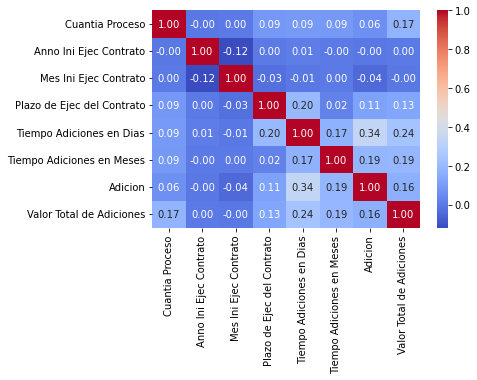

time: 391 ms (started: 2023-05-06 20:51:46 -05:00)


In [82]:
import seaborn as sns
# calculate the correlation matrix
numerical = X.loc[:, ['Cuantia Proceso','Anno Ini Ejec Contrato', 'Mes Ini Ejec Contrato', 'Plazo de Ejec del Contrato','Tiempo Adiciones en Dias','Tiempo Adiciones en Meses','Adicion','Valor Total de Adiciones']]
corr_matrix = numerical.corr()

# Plot the correlation matrix using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [83]:
# Funcion para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

time: 0 ns (started: 2023-05-06 20:51:46 -05:00)


# XGB Regressor Calibration Full

## Paso 0 : Definición inicial de Parámetros

In [113]:
base_score = None
booster = None
colsample_bylevel = None
colsample_bynode = None
enable_categorical = False
importance_type=None
interaction_constraints=None
max_delta_step=None

objective = 'binary:logistic'
eval_metric = "logloss"

learning_rate=None
max_depth = 6
n_estimators=100
colsample_bytree = 1
gamma = 0
min_child_weight = 1
reg_alpha=None
reg_lambda=None
subsample = 1

random_state=1
silent = 0
seed = 0
verbosity=0

time: 16 ms (started: 2023-05-07 09:08:50 -05:00)


## Paso 1: Calibración de max_depth y min_child_weight

In [114]:
parameters = {}
parameters['max_depth'] = max_depth
parameters['min_child_weight']= min_child_weight
parameters['gamma'] = gamma
parameters['subsample']= subsample
parameters['colsample_bytree']= colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators

scores = []

cv_params = {'max_depth':range(3,10,2),  # Valor entre 3 y 10.
             'min_child_weight': [1,3,5]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                    
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'mean_fit_time': array([ 4.43964119,  4.35406771,  4.49202747,  6.57012744,  6.56018271,
        6.47687745,  8.669697  ,  8.6388885 ,  8.62979984, 13.36130748,
       12.12680469, 10.59254661]), 'std_fit_time': array([0.13519867, 0.04780222, 0.09846059, 0.06999536, 0.09891829,
       0.05079607, 0.15291081, 0.08536954, 0.22185035, 1.3411604 ,
       1.59646433, 0.32020014]), 'mean_score_time': array([0.02077737, 0.0184041 , 0.01755881, 0.02040777, 0.0201056 ,
       0.01870475, 0.01811938, 0.02021704, 0.02061143, 0.02860918,
       0.02440553, 0.02010522]), 'std_score_time': array([0.00634009, 0.00135698, 0.00086725, 0.00185954, 0.00233448,
       0.00139964, 0.00066993, 0.0007399 , 0.00048617, 0.00273196,
       0.00531557, 0.00185393]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False

### Estable óptimos temporales max_depth y min_child_weight

In [115]:
max_depth = gbm.best_params_['max_depth']
min_child_weight = gbm.best_params_['min_child_weight']
parameters['max_depth'] = max_depth
parameters['min_child_weight'] = min_child_weight
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 09:17:00 -05:00)


### Calibración de max_depth y min_child_weight con grilla detallada

In [116]:
cv_params = {'max_depth': [max_depth-1, max_depth, max_depth+1], 
             'min_child_weight': [min_child_weight-1, min_child_weight-0.5, min_child_weight, min_child_weight+0.5, min_child_weight+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                        
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'mean_fit_time': array([ 9.84055648,  9.64249659,  9.31065173,  9.70734496,  9.64554358,
       10.65117631, 10.89496756, 10.61595078, 10.95131044, 10.97595615,
       12.32236638, 11.95430121, 11.94200902, 11.8042954 , 11.7844316 ]), 'std_fit_time': array([0.26594216, 0.17117487, 0.06619939, 0.31976639, 0.11746028,
       0.09960216, 0.44005102, 0.1513251 , 0.17271345, 0.6264628 ,
       0.35392644, 0.19993475, 0.27003165, 0.26571318, 0.19075052]), 'mean_score_time': array([0.021208  , 0.01885095, 0.01959605, 0.01920447, 0.02201247,
       0.01940718, 0.01961236, 0.0203083 , 0.02151213, 0.02082229,
       0.02090702, 0.02141318, 0.02020459, 0.02760625, 0.02171273]), 'std_score_time': array([0.0011709 , 0.00099391, 0.00162316, 0.00160058, 0.00261242,
       0.00162769, 0.00196116, 0.00172116, 0.00105417, 0.00266347,
       0.00294177, 0.0008001 , 0.00183325, 0.01682767, 0.00074186]), 'param_max_depth': masked_array(data=[8, 

### Estable óptimos definitivos max_depth y min_child_weight

In [117]:
max_depth = gbm.best_params_['max_depth']
min_child_weight = gbm.best_params_['min_child_weight']
parameters['max_depth'] = max_depth
parameters['min_child_weight'] = min_child_weight
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 09:30:45 -05:00)


## Paso 2: Calibración de Parámetro Gamma

In [118]:
cv_params = {'gamma': [i/10.0 for i in range(1,10,2)]}

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                                                                
                                    ),
                   
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'mean_fit_time': array([10.2839952 , 10.13858027, 10.2693295 , 10.20681996, 10.25503802]), 'std_fit_time': array([0.38869288, 0.24509174, 0.3739003 , 0.09162724, 0.13206321]), 'mean_score_time': array([0.02011108, 0.02122402, 0.02021208, 0.0356698 , 0.02289014]), 'std_score_time': array([0.00048699, 0.00208181, 0.00075115, 0.02519368, 0.00341887]), 'param_gamma': masked_array(data=[0.1, 0.3, 0.5, 0.7, 0.9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.1}, {'gamma': 0.3}, {'gamma': 0.5}, {'gamma': 0.7}, {'gamma': 0.9}], 'split0_test_score': array([0.13157895, 0.21052632, 0.15789474, 0.23684211, 0.13157895]), 'split1_test_score': array([0.        , 0.02631579, 0.07894737, 0.02631579, 0.02631579]), 'split2_test_score': array([0.07894737, 0.07894737, 0.05263158, 0.05263158, 0.02631579]), 'split3_test_score': array([0.        , 0.02564103, 0.0256410

### Estable óptimos temporales gamma

In [119]:
gamma = gbm.best_params_['gamma']
parameters['gamma'] = gamma
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 09:35:14 -05:00)


In [120]:
### Calibración de gamma con grilla detallada

time: 16 ms (started: 2023-05-07 09:35:14 -05:00)


In [121]:
cv_params = {'gamma': [gamma-1, gamma-0.5, gamma, gamma+0.5, gamma+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                        
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'mean_fit_time': array([0.16446609, 7.86112127, 8.03146067, 7.98949742, 7.98819199]), 'std_fit_time': array([0.01923539, 0.20508949, 0.30282161, 0.28201966, 0.21613834]), 'mean_score_time': array([0.        , 0.02001243, 0.0193059 , 0.01827989, 0.0183075 ]), 'std_score_time': array([0.        , 0.00125917, 0.00116669, 0.00150225, 0.0019878 ]), 'param_gamma': masked_array(data=[-0.30000000000000004, 0.19999999999999996, 0.7, 1.2,
                   1.7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': -0.30000000000000004}, {'gamma': 0.19999999999999996}, {'gamma': 0.7}, {'gamma': 1.2}, {'gamma': 1.7}], 'split0_test_score': array([       nan, 0.18421053, 0.21052632, 0.10526316, 0.18421053]), 'split1_test_score': array([       nan, 0.02631579, 0.05263158, 0.02631579, 0.        ]), 'split2_test_score': array([       nan, 0.02631579, 0.05263158, 0.05263

### Establece el óptimo definitivo de gamma

In [122]:
gamma = gbm.best_params_['gamma']
parameters['gamma'] = gamma
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 09:38:05 -05:00)


## Paso 3: Calibración de parámetros subsample y colsample_bytree

In [123]:
cv_params = {'subsample': [i/10.0 for i in range(6,11)],
             'colsample_bytree': [i/10.0 for i in range(6,11)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        eval_metric = eval_metric,
                                        random_state=random_state

                                    ),
                   
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'mean_fit_time': array([ 6.28578277,  6.3875134 ,  6.70320821,  6.91666918,  6.87465162,
        7.15673547,  7.39692426,  7.60198073,  7.56854782,  7.95147977,
        7.66071367,  8.05772042,  8.374648  ,  8.44403849,  8.50591993,
        8.30088205,  8.58265605,  9.02140808,  9.17068901,  9.41226411,
        9.41945806,  9.4691401 ,  9.55714297, 10.22198257, 10.23493519]), 'std_fit_time': array([0.30898032, 0.11668998, 0.14286775, 0.16434294, 0.32071375,
       0.36291186, 0.22154948, 0.3039075 , 0.13185739, 0.29485043,
       0.11117777, 0.21884985, 0.26000493, 0.27216221, 0.31533434,
       0.50920326, 0.29968756, 0.27835379, 0.41205664, 0.39874384,
       0.29124193, 0.52936754, 0.3244493 , 0.36431861, 0.25014204]), 'mean_score_time': array([0.02000432, 0.02046227, 0.02351255, 0.02300944, 0.02074347,
       0.01980443, 0.0202198 , 0.02152119, 0.02080464, 0.02000761,
       0.01940413, 0.02011738, 0.01961241, 0.0217080

### Estable óptimos temporales subsample y colsample_bytree

In [124]:
colsample_bytree = gbm.best_params_['colsample_bytree']
subsample = gbm.best_params_['subsample']
parameters['colsample_bytree'] = colsample_bytree
parameters['subsample'] = subsample
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 09:55:24 -05:00)


### Calibración de subsample y colsample_bytree con grilla detallada

In [125]:
cv_params = {'subsample': [i/100.0 for i in range(int((subsample-0.1)*100.0), min(int((subsample+0.1)*100),105) , 5)],
             'colsample_bytree': [i/100.0 for i in range(int((colsample_bytree-0.1)*100.0), min(int((colsample_bytree+0.1)*100),105), 5)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)
print("max_depth and min_child_weight parameters tuned! moving on to refinement")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'mean_fit_time': array([6.02309079, 5.68974237, 5.55300765, 5.98748646, 5.95874386,
       5.95722852, 6.35310025, 6.37540431, 6.39193316, 6.80807996,
       6.81950541, 6.82486696]), 'std_fit_time': array([0.18764193, 0.08512644, 0.06464531, 0.06777013, 0.03453342,
       0.04863159, 0.02290288, 0.06209499, 0.13647729, 0.14113421,
       0.05179805, 0.06470174]), 'mean_score_time': array([0.02040734, 0.02041283, 0.01901054, 0.02054834, 0.01920695,
       0.02000747, 0.02000461, 0.01860409, 0.01920428, 0.01941113,
       0.01953716, 0.01940336]), 'std_score_time': array([0.00101632, 0.00050125, 0.00063268, 0.00186761, 0.00132868,
       0.00154737, 0.00167371, 0.00101995, 0.00147024, 0.00287063,
       0.00165174, 0.00080054]), 'param_colsample_bytree': masked_array(data=[0.5, 0.5, 0.5, 0.55, 0.55, 0.55, 0.6, 0.6, 0.6, 0.65,
                   0.65, 0.65],
             mask=[False, False, False, False, False, False, False, F

### Estable óptimos definitivos subsample y colsample_bytree

In [126]:
colsample_bytree = gbm.best_params_['colsample_bytree']
subsample = gbm.best_params_['subsample']
parameters['colsample_bytree'] = colsample_bytree
parameters['subsample'] = subsample
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 10:01:48 -05:00)


## Paso 4: Calibración de parámetros reg_alpha y reg_lambda

In [127]:
cv_params = {'reg_alpha': [i/10.0 for i in range(1,10,2)], 
             'reg_lambda': [i/10.0 for i in range(1,10,2)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'mean_fit_time': array([6.94841032, 6.85023642, 6.79720349, 6.74580107, 6.73220167,
       6.77232456, 6.69661384, 6.8186573 , 6.69150891, 6.60588746,
       6.67408791, 6.64815941, 6.64612947, 6.616995  , 6.69977689,
       6.73896942, 6.52895656, 6.59515724, 6.94771228, 6.82001438,
       7.04044943, 6.86132097, 6.8330389 , 6.82897911, 6.79699073]), 'std_fit_time': array([0.06446917, 0.08270651, 0.05306101, 0.05171817, 0.08595896,
       0.05689243, 0.06752882, 0.12969318, 0.04095157, 0.07234978,
       0.04694473, 0.07070261, 0.01457267, 0.02473261, 0.24071683,
       0.14283619, 0.10890409, 0.14942543, 0.38363294, 0.30664878,
       0.15934294, 0.07422847, 0.12629195, 0.09165268, 0.07368762]), 'mean_score_time': array([0.01941123, 0.02000709, 0.02081118, 0.01920724, 0.01960435,
       0.02001128, 0.01920414, 0.01880431, 0.02040477, 0.01971917,
       0.01920414, 0.01980462, 0.01900802, 0.01999836, 0.01940436,
       0.0

### Estable óptimos temporales reg_alpha y reg_lambda

In [128]:
reg_alpha = gbm.best_params_['reg_alpha']
reg_lambda = gbm.best_params_['reg_lambda']
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 10:16:05 -05:00)


### Calibración de reg_alpha y reg_lambda con grilla detallada

In [129]:
cv_params = {'reg_lambda': [reg_lambda-1, reg_lambda-0.5, reg_lambda, reg_lambda+0.5, reg_lambda+1], 
             'reg_alpha': [reg_alpha-1, reg_alpha-0.5, reg_alpha, reg_alpha+0.5, reg_alpha+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'mean_fit_time': array([0.17698455, 0.1640666 , 0.16965747, 0.16174369, 0.16675587,
       0.16637559, 0.17608485, 7.06723337, 7.00237188, 7.08061867,
       0.17107582, 0.17171769, 7.01727991, 6.79601021, 6.72105947,
       0.17492294, 0.16189833, 6.8242342 , 6.94707661, 6.61192465,
       0.16069975, 0.16673851, 6.55433788, 6.68756042, 6.55976324]), 'std_fit_time': array([0.00626573, 0.00598484, 0.00954058, 0.01099464, 0.01112119,
       0.01261049, 0.0126889 , 0.12114896, 0.18884671, 0.23615853,
       0.01435585, 0.01334164, 0.25789316, 0.11804203, 0.11748796,
       0.01980062, 0.01046519, 0.2418322 , 0.13219273, 0.11957549,
       0.00883563, 0.01006206, 0.23768258, 0.18607793, 0.22081615]), 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02020493, 0.02180691, 0.02141638,
       0.        , 0.        , 0.02340856, 0.02140493, 0.02232356,
       0. 

### Estable óptimos definitivosreg_alpha y reg_lambda

In [130]:
reg_alpha = gbm.best_params_['reg_alpha']
reg_lambda = gbm.best_params_['reg_lambda']
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 10:23:17 -05:00)


## Revisión de Parámetros y Primera Predicción

In [131]:
# Funcion para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

time: 0 ns (started: 2023-05-07 10:23:17 -05:00)


In [132]:
print(parameters)
print(scores)

{'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.7, 'subsample': 1.0, 'colsample_bytree': 0.65, 'reg_alpha': 0.7, 'reg_lambda': 0.3, 'learning_rate': None, 'n_estimators': 100}
[0.10458839406207827, 0.11524966261808367, 0.08879892037786774, 0.08879892037786774, 0.09932523616734143, 0.1095816464237517, 0.10472334682861, 0.10472334682861]
time: 0 ns (started: 2023-05-07 10:23:17 -05:00)


Recall en el conjunto de prueba: 0.05319148936170213


<Figure size 432x432 with 0 Axes>

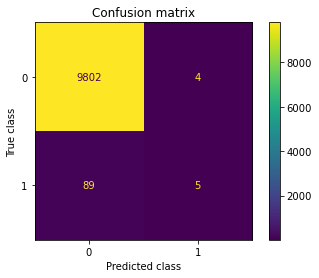

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9806
           1       0.56      0.05      0.10        94

    accuracy                           0.99      9900
   macro avg       0.77      0.53      0.55      9900
weighted avg       0.99      0.99      0.99      9900

Mejores parámetros del modelo: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.65, 'enable_categorical': False, 'gamma': 0.7, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0.7, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 1.0, 'tree_method': 'exact', 'validate_parameter

In [133]:
# Importación y definición de modelo XGBRegressor
xgbPrimer = XGBClassifier(
     objective = objective,
     seed = seed,
     n_estimators = n_estimators,
     max_depth = max_depth,
     min_child_weight = min_child_weight,
     learning_rate = learning_rate,
     gamma = gamma,
     subsample = subsample,
     colsample_bytree = colsample_bytree,
     reg_alpha = reg_alpha,
     reg_lambda = reg_lambda,
     silent = False,
     eval_metric = eval_metric,
     random_state=random_state
    
 )

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
xgbPrimer.fit(X_train, y_train)
y_pred_primer = xgbPrimer.predict(X_test)


#Imprimir Resultados
test_score = recall_score(y_test, y_pred_primer)
print('Recall en el conjunto de prueba:', test_score)
mostrar_resultados(y_test, y_pred_primer)

# Imprimir los mejores hiperparámetros y los parámetros correspondientes del modelo
print('Mejores parámetros del modelo:', xgbPrimer.get_params())

In [134]:
y_pred_primer

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

time: 15 ms (started: 2023-05-07 10:23:26 -05:00)


## Paso 5: Calibración parametros learning_rate y n_estimators

In [135]:
cv_params = {'learning_rate': [0.01, 0.1, 0.2, 0.3],
             'n_estimators': [50, 100, 200]
}

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'mean_fit_time': array([ 1.90978603,  4.0589602 ,  9.03419976,  3.18483281,  6.60975971,
       13.08311248,  3.35999818,  6.68269305, 12.92801018,  3.38529286,
        6.83058887, 13.82188678]), 'std_fit_time': array([0.08829648, 0.26771144, 0.26549721, 0.3660763 , 0.2692529 ,
       0.195725  , 0.08268656, 0.2040469 , 0.13542647, 0.13007932,
       0.10453662, 0.43702685]), 'mean_score_time': array([0.01740565, 0.01840591, 0.01970568, 0.01860414, 0.15880418,
       0.02100458, 0.01960831, 0.02060471, 0.02060776, 0.01920452,
       0.01870537, 0.0209034 ]), 'std_score_time': array([0.00120537, 0.00152945, 0.0021817 , 0.00102043, 0.28008717,
       0.00089447, 0.00195907, 0.00135658, 0.00102127, 0.00204024,
       0.00132856, 0.00224801]), 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3,
                   0.3, 0.3],
             mask=[False, False, False, False, False, False, Fa

### Establece óptimos temporales para learning_rate y n_estimators

In [136]:
learning_rate = gbm.best_params_['learning_rate']
n_estimators = gbm.best_params_['n_estimators']
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 10:30:51 -05:00)


In [137]:
### Calibración de learning_rate y n_estimators

time: 0 ns (started: 2023-05-07 10:30:51 -05:00)


In [138]:
cv_params = {'learning_rate': [learning_rate*0.2, learning_rate*0.5, learning_rate, learning_rate*2, learning_rate*5],
             'n_estimators': [(n_estimators*3/4), n_estimators, n_estimators*5/4]
             
            }           
gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'mean_fit_time': array([ 0.16574793, 13.04423318,  0.16675611,  0.17278905, 13.38704362,
        0.16750121,  0.17790017, 13.6811223 ,  0.16988249,  0.16599474,
       13.34376025,  0.16466832,  0.1766151 , 11.82491274,  0.16775112]), 'std_fit_time': array([0.01372508, 0.19557302, 0.00763948, 0.00524862, 0.17728572,
       0.00839686, 0.008913  , 0.3788687 , 0.00558047, 0.01100343,
       0.44603592, 0.00601544, 0.014462  , 0.43470809, 0.01180781]), 'mean_score_time': array([0.        , 0.02351823, 0.        , 0.        , 0.0227097 ,
       0.        , 0.        , 0.02100468, 0.        , 0.        ,
       0.02116499, 0.        , 0.        , 0.02280622, 0.        ]), 'std_score_time': array([0.        , 0.00364982, 0.        , 0.        , 0.0007453 ,
       0.        , 0.        , 0.00063249, 0.        , 0.        ,
       0.00158795, 0.        , 0.        , 0.01038939, 0.        ]), 'param_learning_rate': masked_array(data=

### Establece óptimos definitivos para learning_rate y n_estimators

In [139]:
learning_rate = gbm.best_params_['learning_rate']
n_estimators = gbm.best_params_['n_estimators']
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 10:36:45 -05:00)


In [140]:
print(parameters)
print(scores)

{'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.7, 'subsample': 1.0, 'colsample_bytree': 0.65, 'reg_alpha': 0.7, 'reg_lambda': 0.3, 'learning_rate': 0.3, 'n_estimators': 200}
[0.10458839406207827, 0.11524966261808367, 0.08879892037786774, 0.08879892037786774, 0.09932523616734143, 0.1095816464237517, 0.10472334682861, 0.10472334682861, 0.12010796221322537, 0.12010796221322537]
time: 0 ns (started: 2023-05-07 10:36:45 -05:00)


Recall en el conjunto de prueba: 0.05319148936170213


<Figure size 432x432 with 0 Axes>

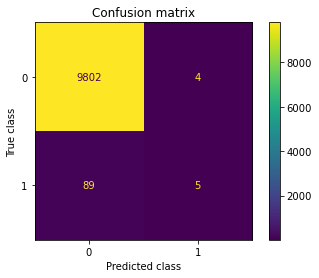

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9806
           1       0.56      0.05      0.10        94

    accuracy                           0.99      9900
   macro avg       0.77      0.53      0.55      9900
weighted avg       0.99      0.99      0.99      9900

Mejores parámetros del modelo: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.65, 'enable_categorical': False, 'gamma': 0.7, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.3, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 200, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0.7, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 1.0, 'tree_method': 'exact', 'validate_parameters': 1, '

In [141]:
# Importación y definición de modelo XGBRegressor
xgbsegundo = XGBClassifier(
     objective = objective,
     seed = seed,
     n_estimators = n_estimators,
     max_depth = max_depth,
     min_child_weight = min_child_weight,
     learning_rate = learning_rate,
     gamma = gamma,
     subsample = subsample,
     colsample_bytree = colsample_bytree,
     reg_alpha = reg_alpha,
     reg_lambda = reg_lambda,
     silent = False,
     eval_metric = eval_metric,
    random_state=random_state
 
 )

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
xgbsegundo.fit(X_train, y_train)
y_pred_segundo = xgbsegundo.predict(X_test)

#Imprimir Resultados
test_score_segundo = recall_score(y_test, y_pred_segundo)
print('Recall en el conjunto de prueba:', test_score_segundo)
mostrar_resultados(y_test, y_pred_segundo)

# Imprimir los mejores hiperparámetros y los parámetros correspondientes del modelo
print('Mejores parámetros del modelo:', xgbsegundo.get_params())